In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('BlackFriday.csv')

In [5]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [8]:
for col in df.columns:
    print(df[col].nunique(),"\t: ", col)
    

5891 	:  User_ID
3623 	:  Product_ID
2 	:  Gender
7 	:  Age
21 	:  Occupation
3 	:  City_Category
5 	:  Stay_In_Current_City_Years
2 	:  Marital_Status
18 	:  Product_Category_1
17959 	:  Purchase


## Gender comparison of who shops the most


<Axes: title={'center': ' Gender Comparison'}>

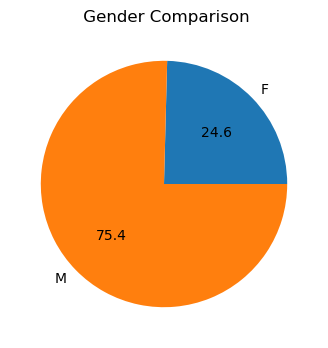

In [9]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.1f', figsize = (4,4), title = ' Gender Comparison')

## Average Money spent based on Gender


<Axes: title={'center': 'Average Spent Based on Gender'}, ylabel='Purchase'>

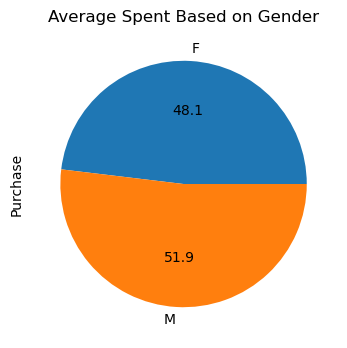

In [10]:
df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie', autopct = '%0.1f',figsize=(4,4), title = 'Average Spent Based on Gender')

<Axes: title={'center': 'AGE BASED DISTRIBUTION'}, xlabel='Age'>

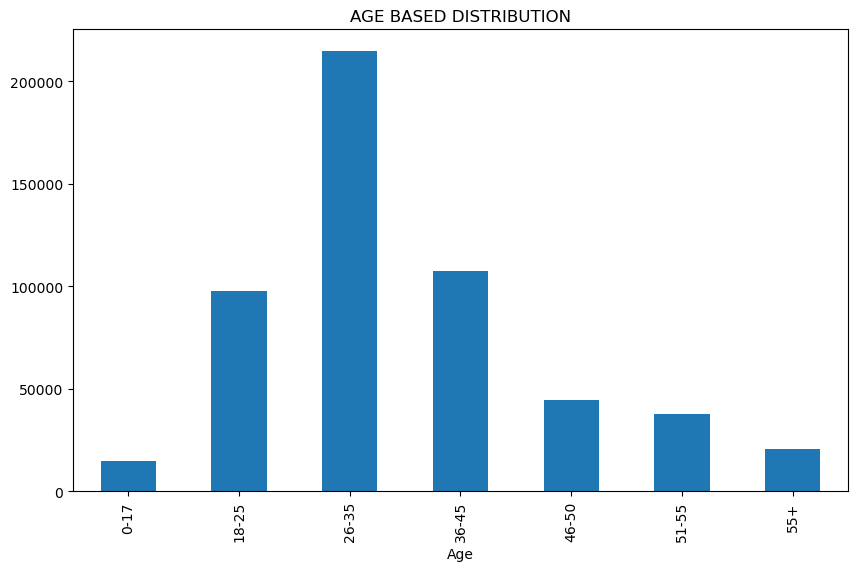

In [11]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (10,6), title = 'AGE BASED DISTRIBUTION')

In [12]:
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst, columns = ['Age','Unique_Products'])

<Axes: xlabel='Age'>

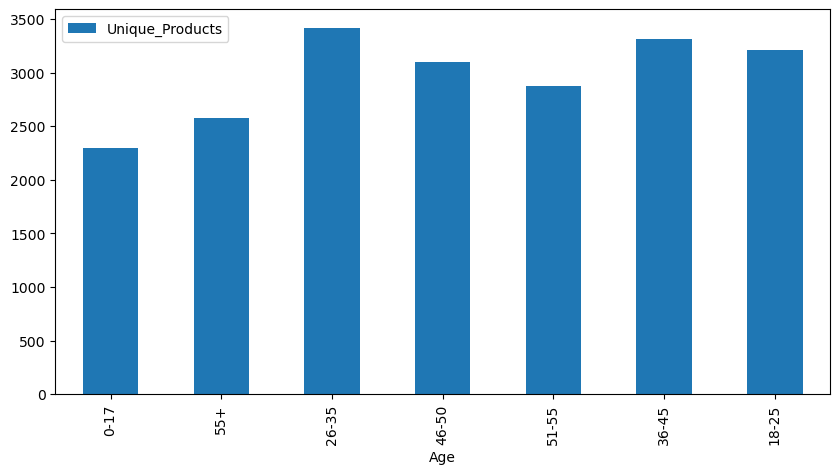

In [13]:
data.plot.bar(x = 'Age', figsize = (10,5))

<Axes: title={'center': 'AGE BASED AMOUNT DISTRIBUTION'}, xlabel='Age'>

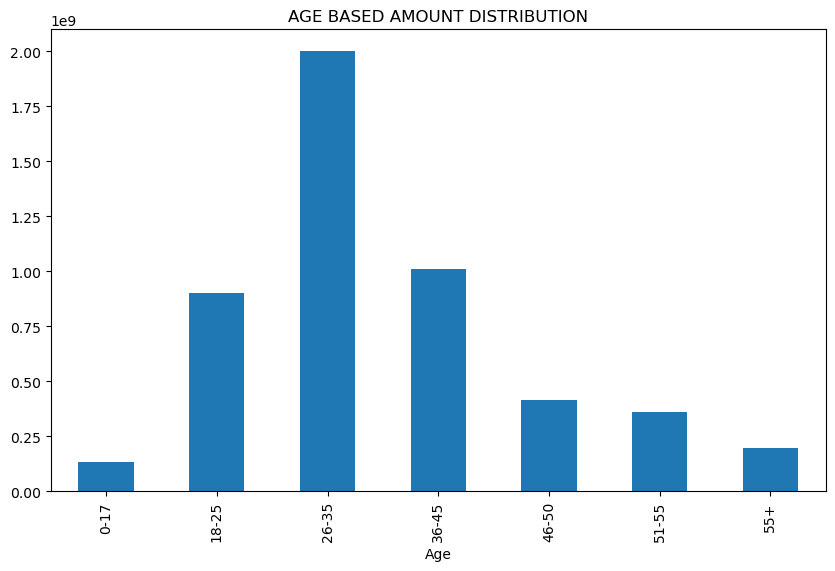

In [14]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar', figsize = (10,6), title = 'AGE BASED AMOUNT DISTRIBUTION')

<Axes: title={'center': 'AGE BASED AVG AMOUNT DISTRIBUTION'}, ylabel='Purchase'>

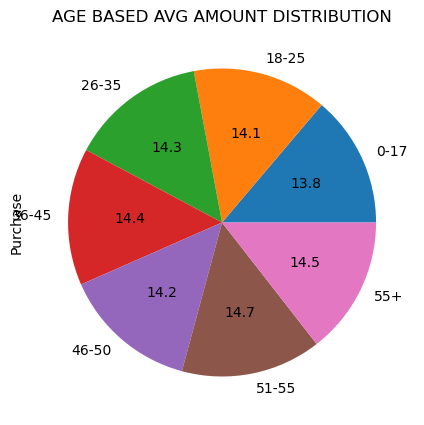

In [15]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie', figsize = (5,5),autopct = '%0.1f' ,title = 'AGE BASED AVG AMOUNT DISTRIBUTION')

## Multi-Column Analysis

<Axes: xlabel='Age', ylabel='count'>

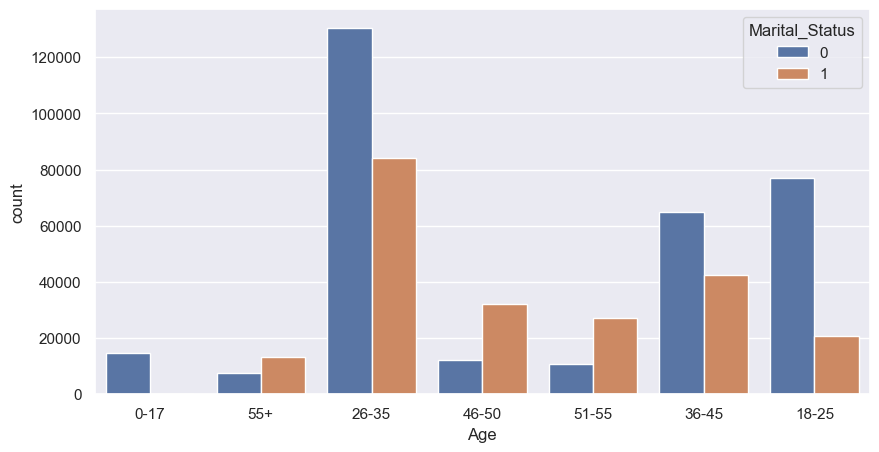

In [16]:
sns.set(rc ={'figure.figsize':(10,5)})
sns.countplot(x = 'Age', hue = 'Marital_Status',data = df)

<Axes: xlabel='Age', ylabel='count'>

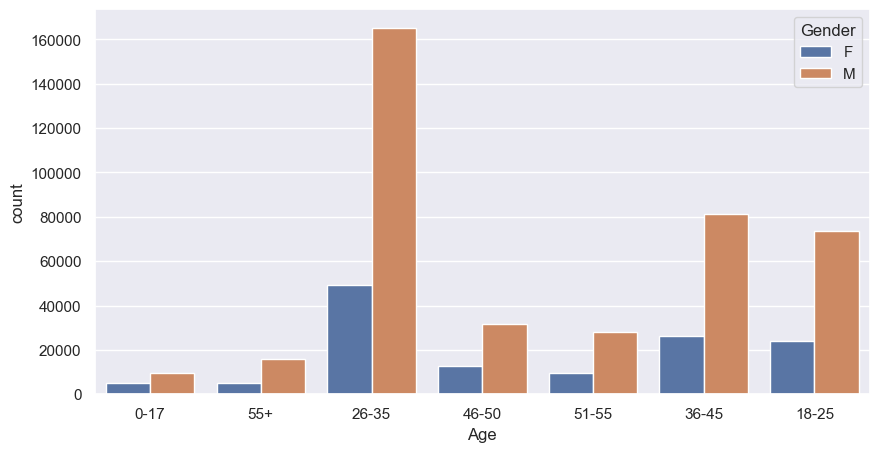

In [17]:
sns.set(rc ={'figure.figsize':(10,5)})
sns.countplot(x = 'Age', hue = 'Gender',data = df)

<Axes: xlabel='Age', ylabel='count'>

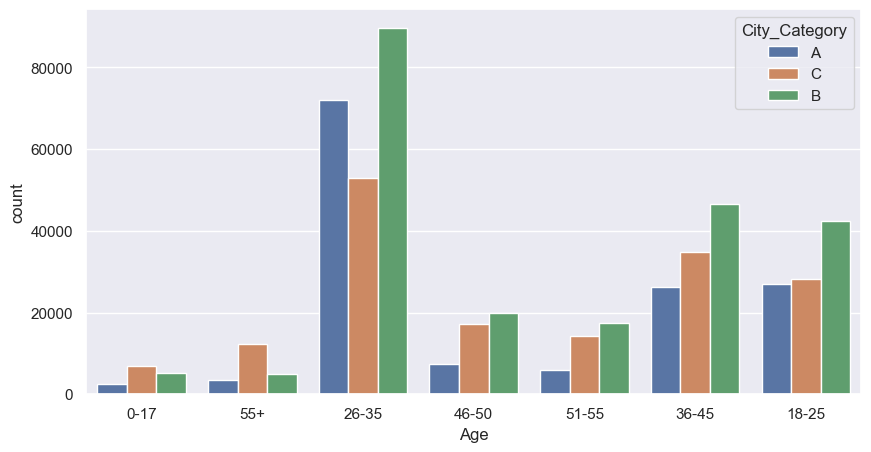

In [18]:
sns.set(rc ={'figure.figsize':(10,5)})
sns.countplot(x = 'Age', hue = 'City_Category',data = df)

<Axes: xlabel='City_Category', ylabel='count'>

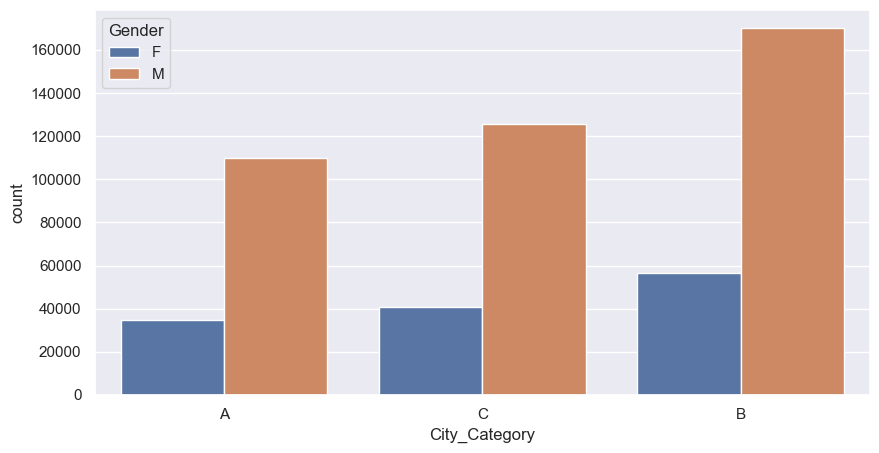

In [19]:
sns.set(rc ={'figure.figsize':(10,5)})
sns.countplot(x = 'City_Category', hue = 'Gender',data = df)

<Axes: xlabel='City_Category', ylabel='count'>

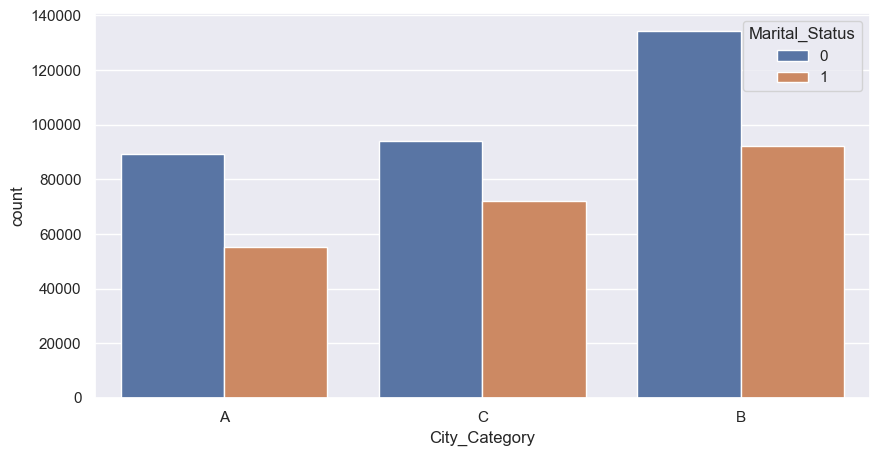

In [20]:
sns.set(rc ={'figure.figsize':(10,5)})
sns.countplot(x = 'City_Category', hue = 'Marital_Status',data = df)

<Axes: title={'center': ' City Category According to sum Purchase'}, ylabel='Purchase'>

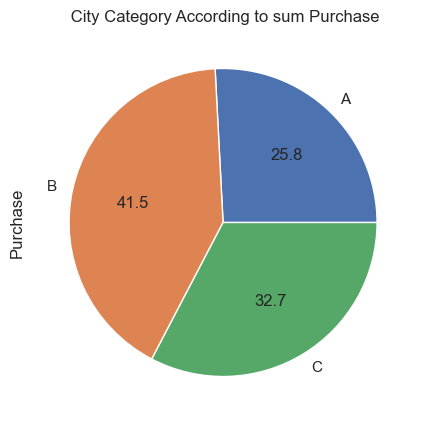

In [78]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie',autopct = '%0.1f', title = ' City Category According to sum Purchase')

<Axes: ylabel='Purchase'>

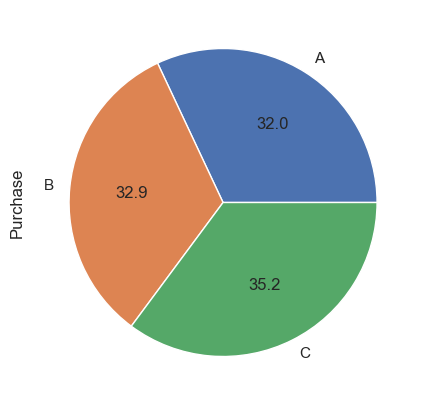

In [22]:
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie',autopct = '%0.1f')

## ANALYSIS BASED ON OCCUPATION AND PRODUCTS


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

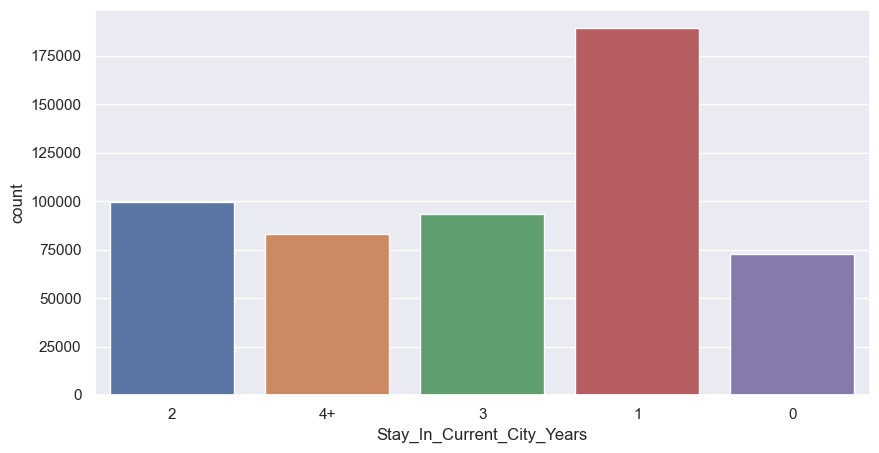

In [23]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = df)

<Axes: title={'center': 'Percent of people who buys from each city'}>

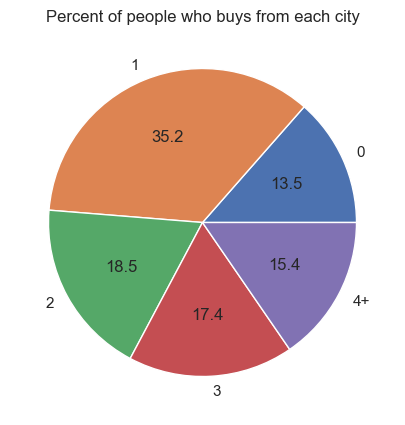

In [24]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = '%0.1f',title = 'Percent of people who buys from each city')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

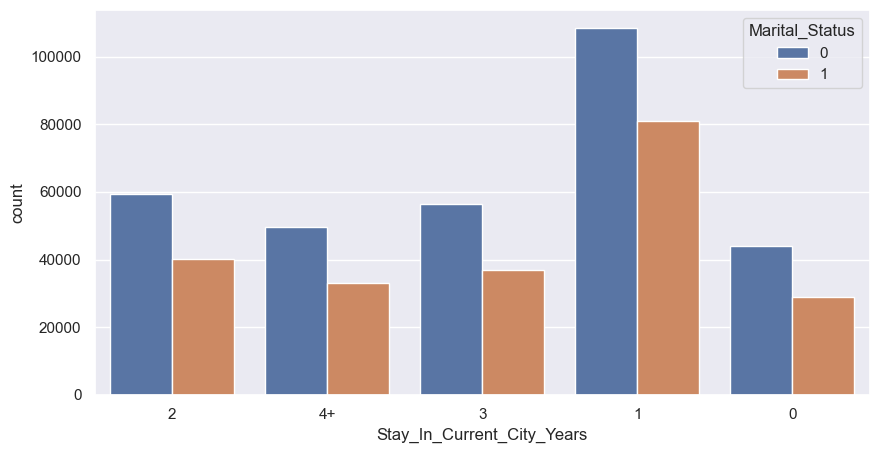

In [25]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

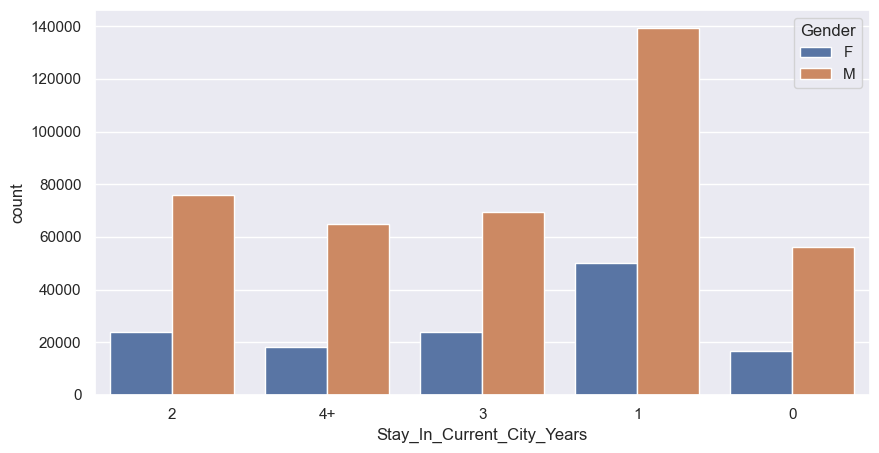

In [26]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

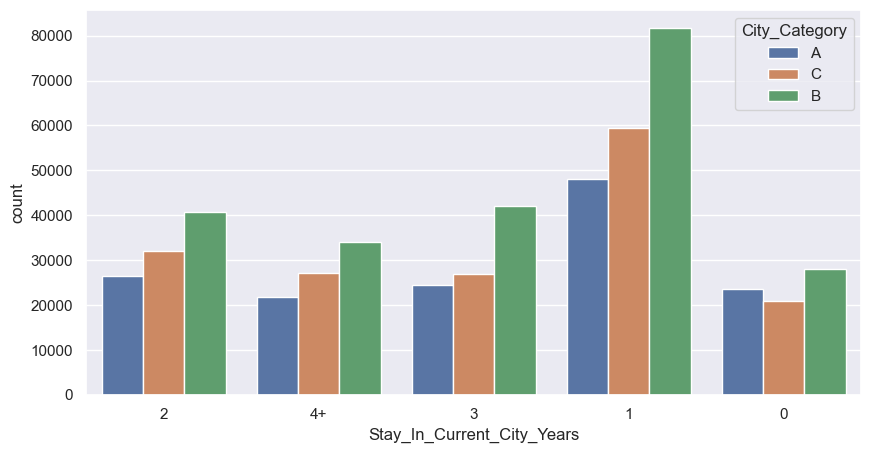

In [27]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

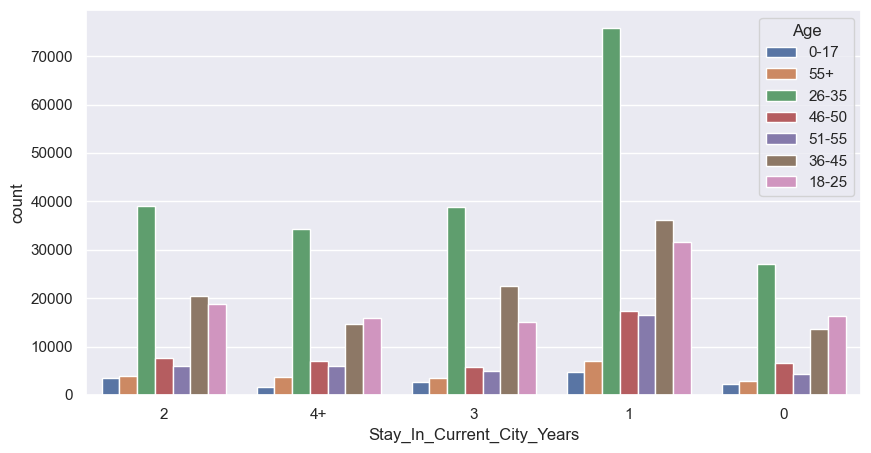

In [28]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Age', data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

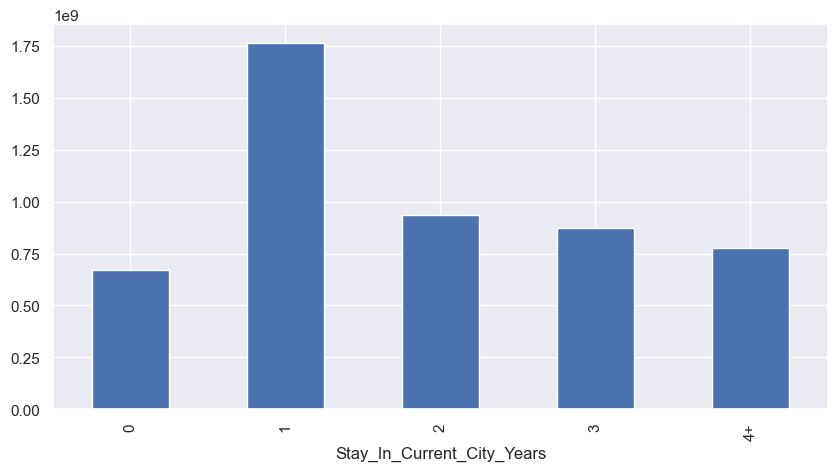

In [29]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar')

<Axes: ylabel='Purchase'>

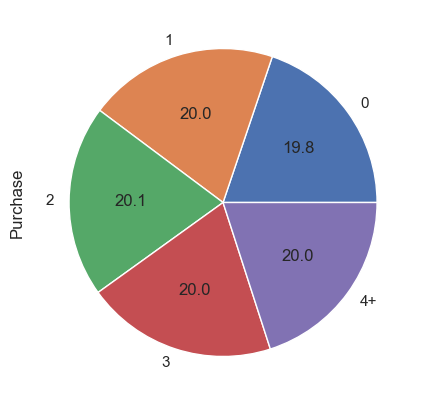

In [30]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='Occupation', ylabel='count'>

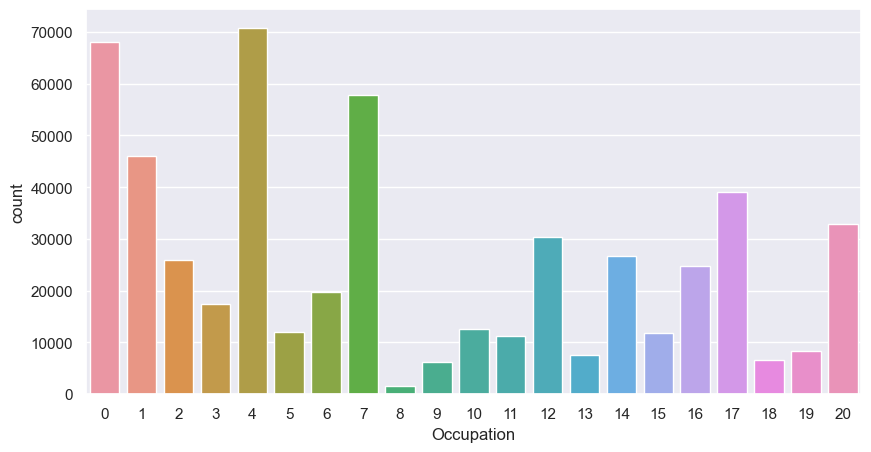

In [31]:
sns.countplot(x = 'Occupation', data = df)

<Axes: xlabel='Occupation'>

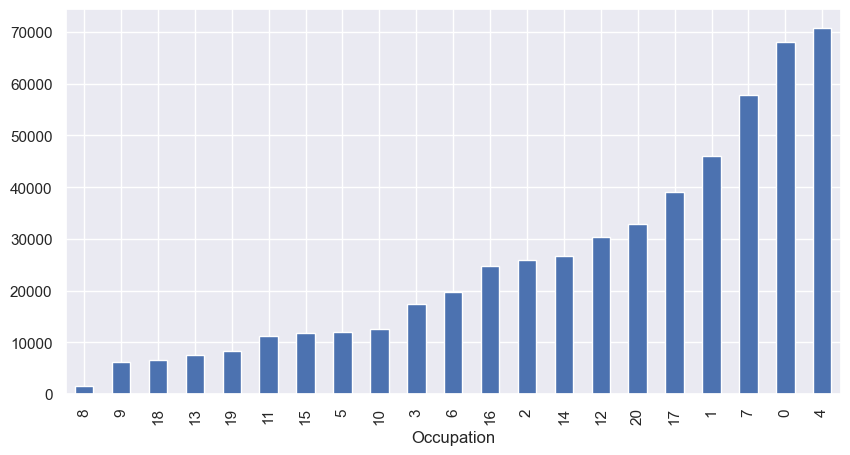

In [32]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

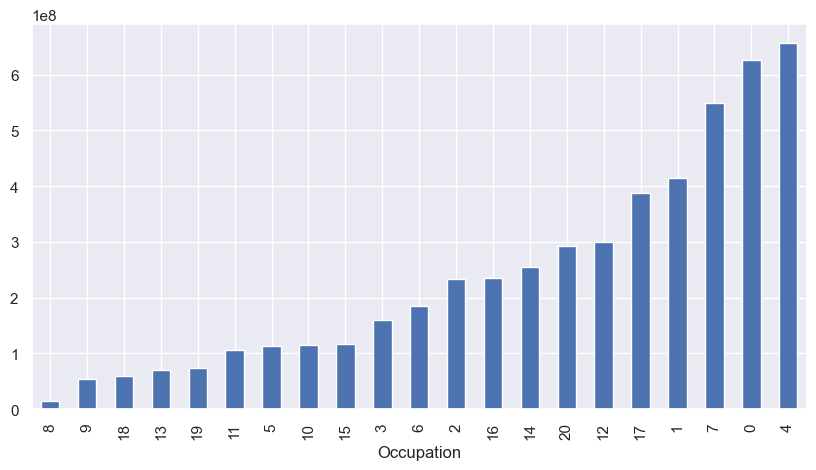

In [33]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

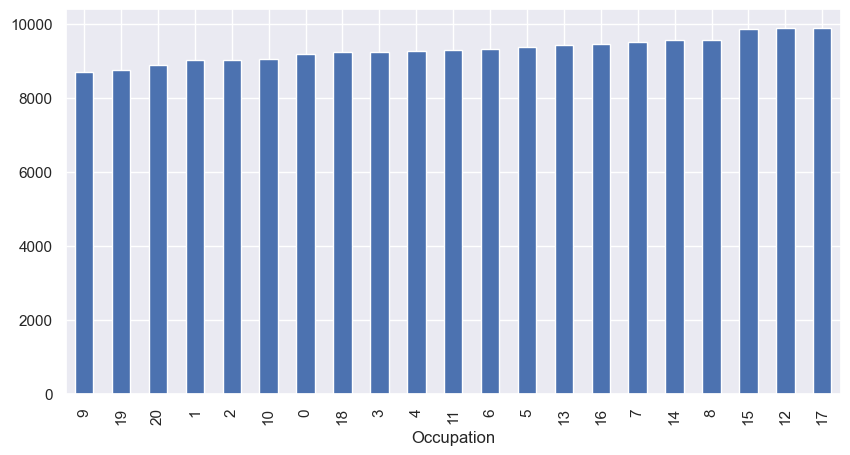

In [34]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

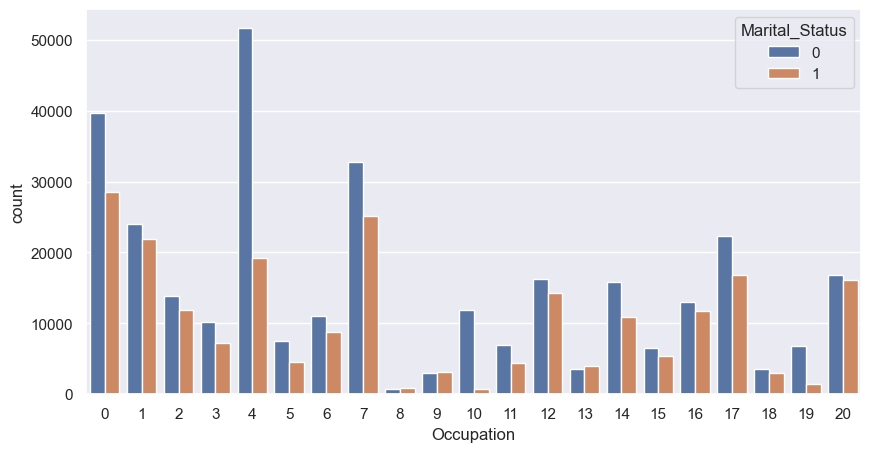

In [35]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status',data = df)

<Axes: xlabel='Occupation', ylabel='count'>

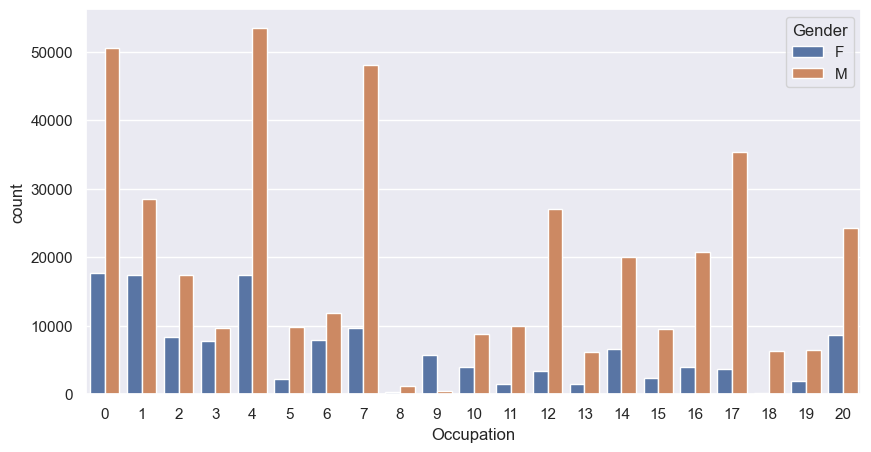

In [36]:
sns.countplot(x = 'Occupation', hue = 'Gender',data = df)

<Axes: xlabel='Occupation'>

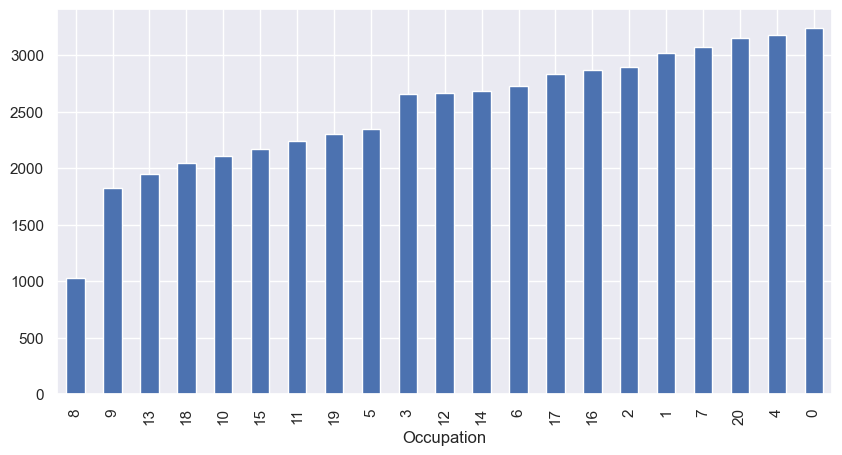

In [37]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind = 'bar')

In [38]:
df.groupby('Product_Category_1').size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

<Axes: xlabel='Product_Category_1'>

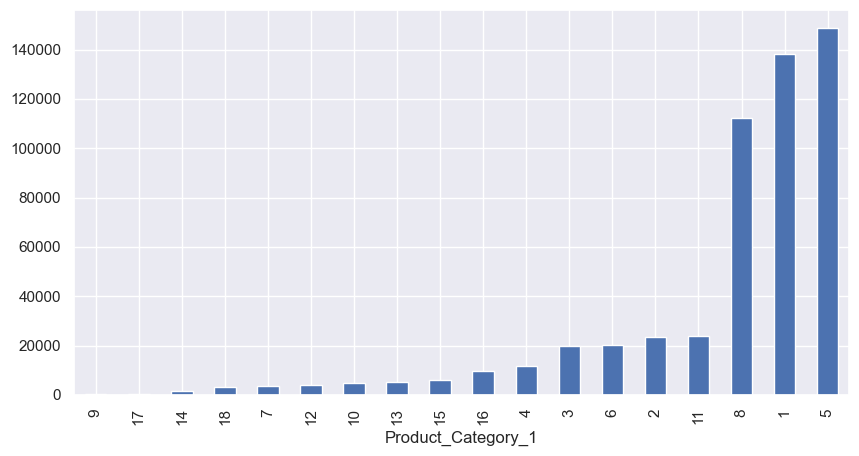

In [39]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

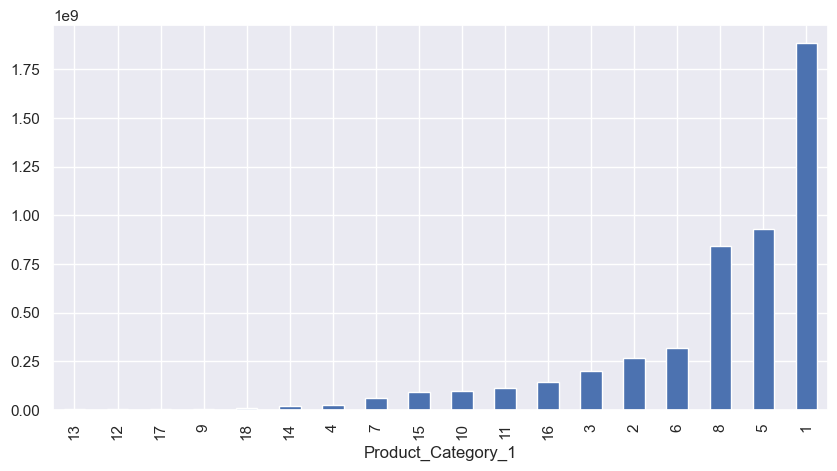

In [40]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

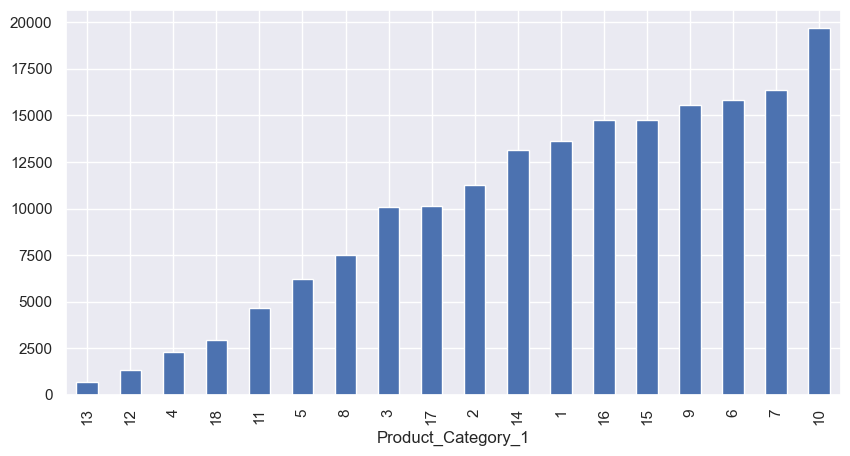

In [41]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

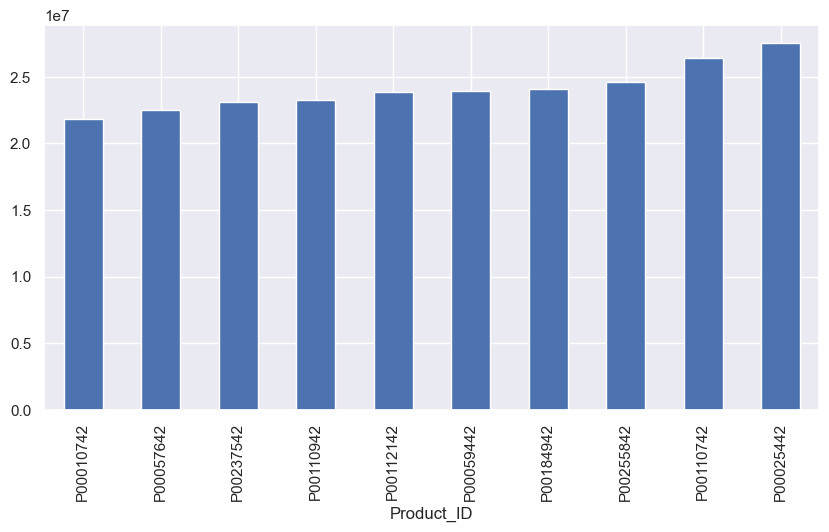

In [42]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

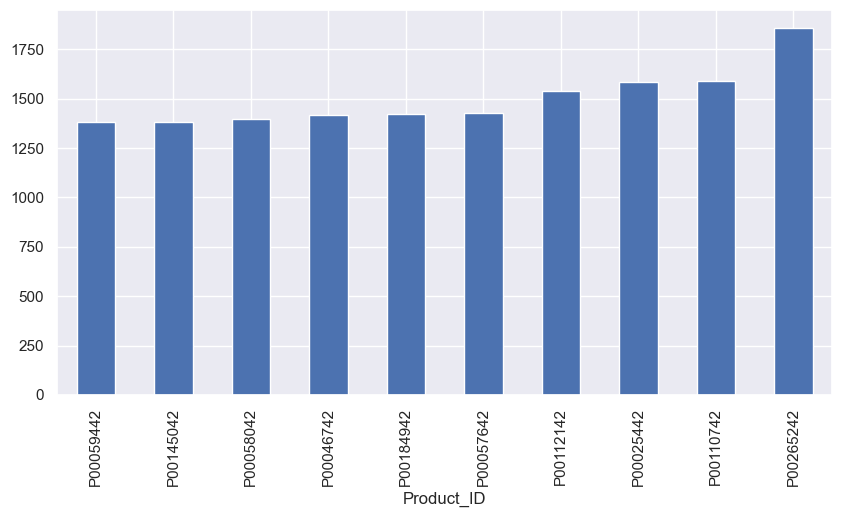

In [43]:
df.groupby('Product_ID')['Purchase'].size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

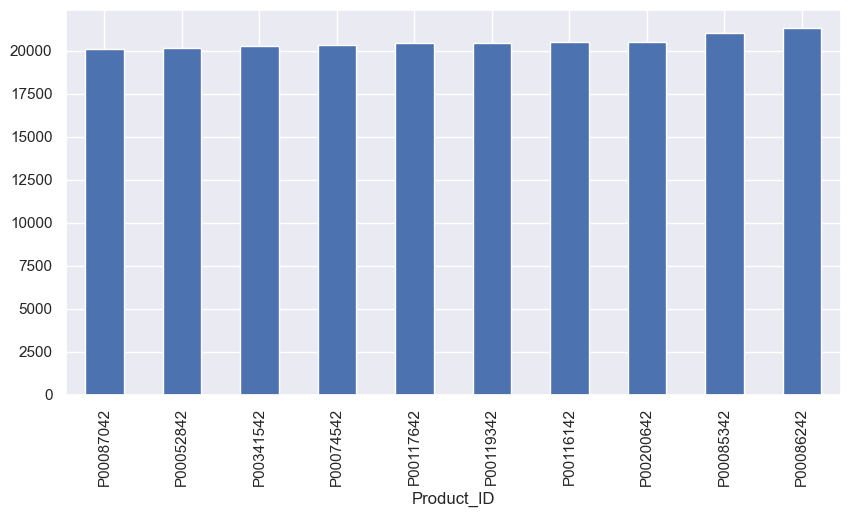

In [44]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

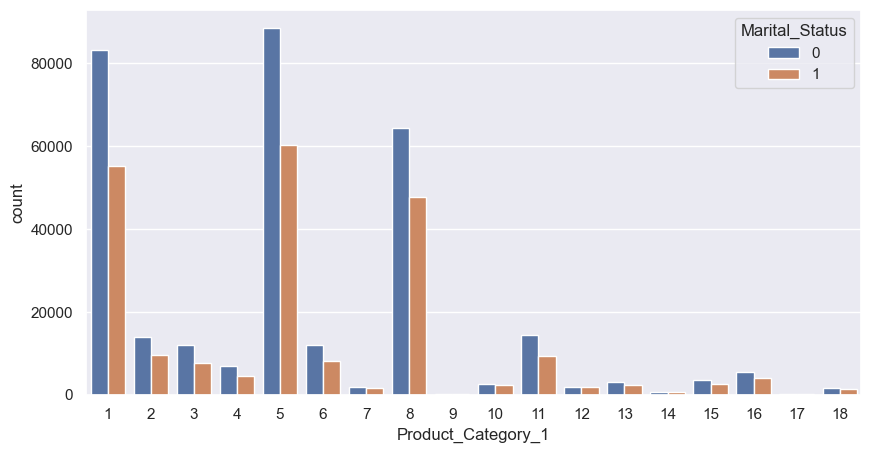

In [45]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status',data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

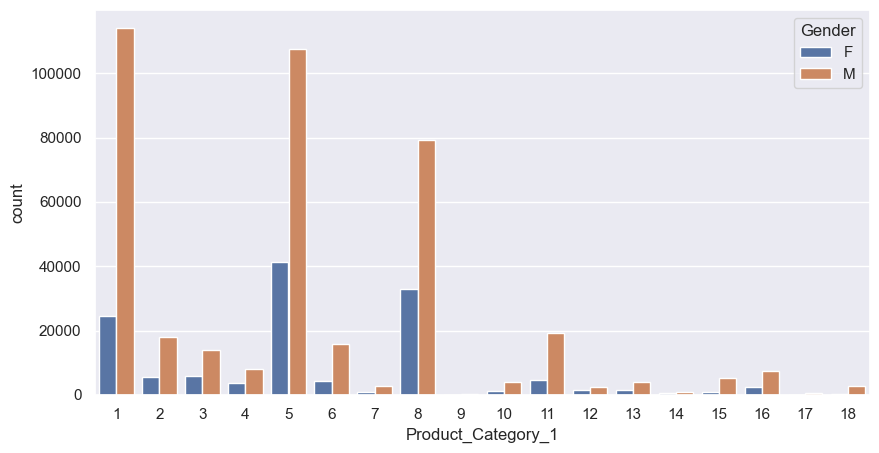

In [46]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender',data = df)

## Combining Gender and Marital Statusand Analysing based on the results.

In [60]:
lst = []
for i in range(len(df)):
    lst.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
df['Marital_Gender'] = lst

In [61]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

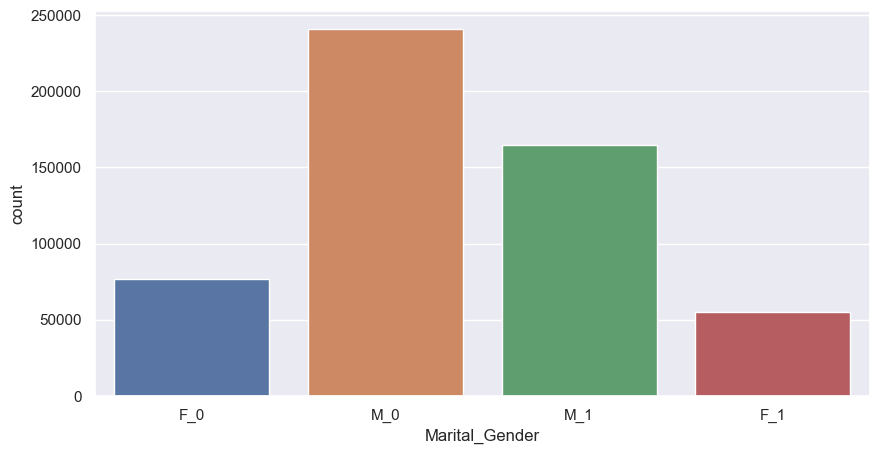

In [62]:
sns.countplot(x = df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

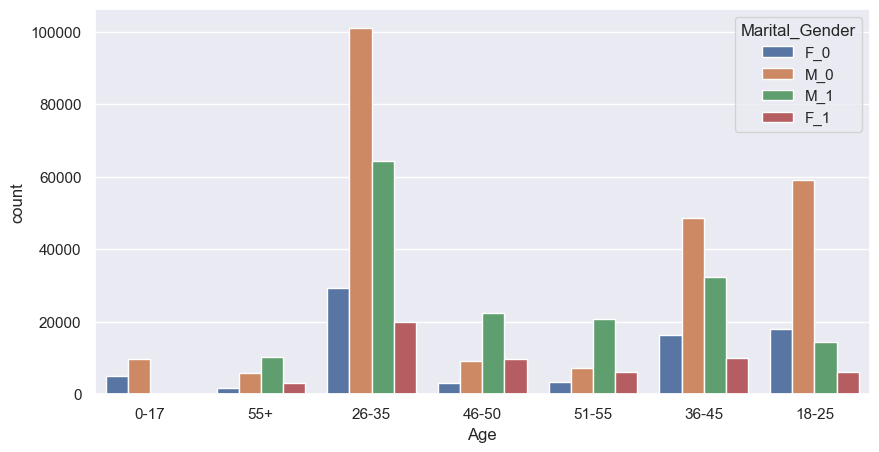

In [63]:
sns.countplot(x = 'Age', hue = 'Marital_Gender', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

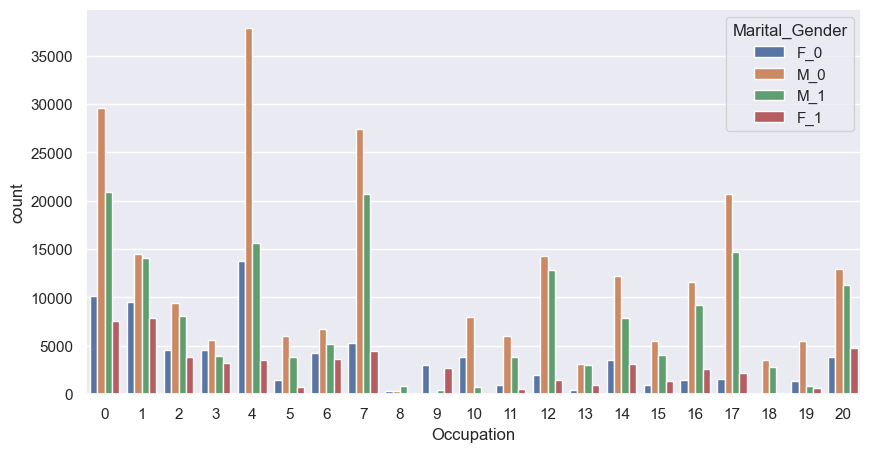

In [64]:
sns.countplot(x = 'Occupation', hue = 'Marital_Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

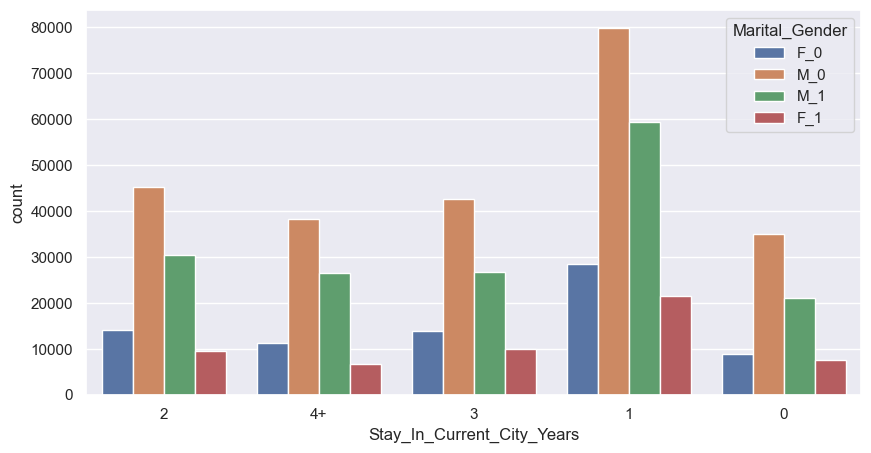

In [65]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

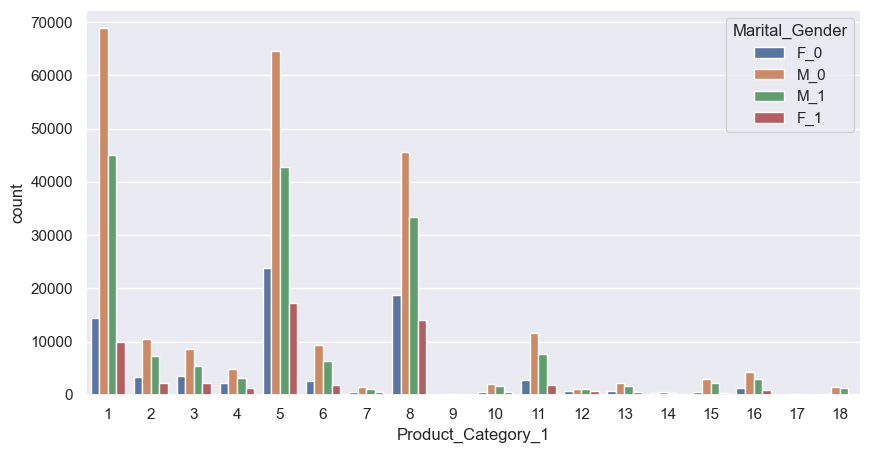

In [66]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Gender', data = df)

<Axes: title={'center': 'Sum purchase amount according to Marital Status and Gender'}, ylabel='Purchase'>

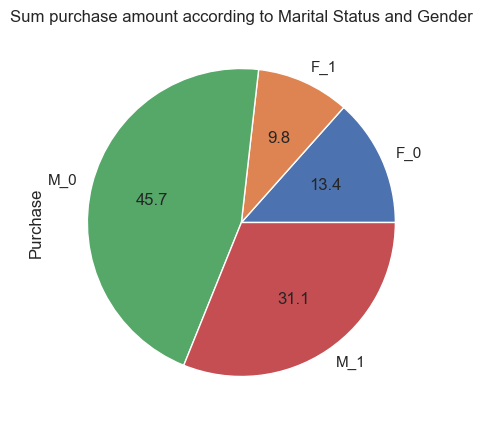

In [76]:
df.groupby('Marital_Gender')['Purchase'].sum().plot(kind = 'pie',autopct = '%0.1f', title = 'Sum purchase amount according to Marital Status and Gender')

<Axes: title={'center': 'Average purchase according to Marital Status and Gender'}, ylabel='Purchase'>

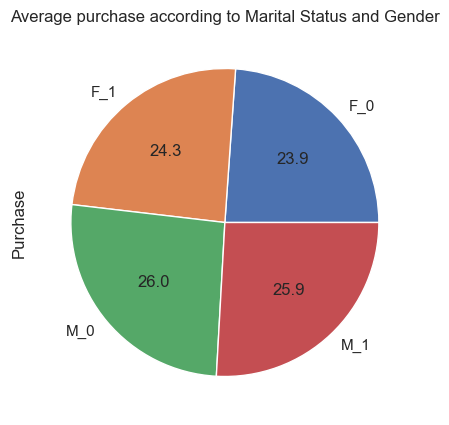

In [77]:
df.groupby('Marital_Gender')['Purchase'].mean().plot(kind = 'pie',autopct = '%0.1f',title = 'Average purchase according to Marital Status and Gender')